# Visual Analytics

## Assignment 1

**Instructor:** Dr. Marco D'Ambros  
**TAs:** Carmen Armenti, Mattia Giannaccari

**Contacts:** marco.dambros@usi.ch, carmen.armenti@usi.ch, mattia.giannaccari@usi.ch

**Due Date:** 10 April, 2025 @ 23:55

---

### Goal

The goal of this assignment is to use Python and Jupyter notebook to explore, analyze and visualize the datasets provided. 

The assignment is divided into four sections, each requiring you to apply the knowledge gained from both the theoretical and practical lectures to solve the exercises. Specifically, when creating tabular or graphical representations, you should apply the principles learned in the theoretical lectures and use the technologies introduced in the practical sessions. The datasets you need to use are detailed in the **Datasets Description** section and can be found in the following folder [Assignment1_Data](https://usi365-my.sharepoint.com/:f:/g/personal/armenc_usi_ch/EqjXB7uSEoVAujKPSZY1hvIBMhAXJv5y6Z-UwaO6bCtOjg?e=kxcaai).

### Submission Guidelines
- **Format:** Please submit a Jupyter Notebook containing your solutions along with a clear explanation of the **steps** taken to arrive at each solution. Each solution must be introduced by a Markdown cell indicating the exercise number. If you prefer, you may use the uploaded assignment file and develop your solution by adding cells below each exercise instructions. It is essential that every choice is justified, and the solution is thoroughly commented to explain each step. Exercises without explanations will be evaluated negatively.

- **Filename:** Please name the Jupyter notebook as follows: `SurenameName_Assignment1.ipynb`.

- **Submission:** Please submit your solution (the jupyter notebook and any other script you may have used to support your solution) to iCorsi.


---
## Section 1 - Data quality (10 points)

**Data Source:** `used_cars.csv`.

In the `used_cars.csv` dataset, please perform the following data cleaning steps: 
- Identify any missing or invalid values in the following columns: `vehicle type`, `price`, `brand`, and `month of registration`. If needed, standardize the data. For the `price` column specifically, the prices are recorded in euros, please consider valid only values within the range of €1,000 and €500,000. 
- For each of the previous columns, report the number of missing or invalid entries.
- After identifying missing or invalid values in the columns above, remove **any** rows where at least one of these columns contains such data.

Please clearly outline the steps you take to clean the dataset and document your approach. You may use any preferred tool or technology, such as Python (vanilla or Pandas) or OpenRefine.

### Libraries for the notebook

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.layouts import column
from bokeh.models import (BasicTickFormatter, ColorBar, ColumnDataSource,
                          CustomJS, FixedTicker, GeoJSONDataSource, HoverTool,
                          Legend, LegendItem, LinearColorMapper,
                          LogTickFormatter, NumeralTickFormatter, Select)
from bokeh.palettes import Reds
from bokeh.plotting import figure, output_notebook, show
from bokeh.transform import dodge, linear_cmap
from matplotlib.colors import LinearSegmentedColormap

# %config InlineBackend.figure_format = 'retina'

output_notebook()

Loading BokehJS ...

----------

In [ ]:
# Load the dataset and display the first few rows
cars_dataset = pd.read_csv('./datasets/used_cars.csv', encoding='windows-1252')
cars_dataset.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [ ]:
# Analyze the columns requested in the task. Count the number of null values on them
columns = cars_dataset[['vehicleType', 'price', 'brand', 'monthOfRegistration']]
nan_values = columns.isnull().sum()
print("Null values:")
print(nan_values)

Null values:
vehicleType            37869
price                      0
brand                      0
monthOfRegistration        0
dtype: int64


In [ ]:
# Check brand values
print(cars_dataset["brand"].value_counts())

brand
volkswagen        79640
bmw               40265
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
bmw                   6
BMW       

Come è possibile vedere, abbiamo un brand che si ripete a causa di differenze di formattazione (ad esempio lower e upper case e abbiamo la ripetizione di 2 bmw, probabilmente dato dal fatto che uno dei due valori contiene caratteri non visibili)

In [5]:
cars_dataset["brand"] = cars_dataset["brand"].apply(lambda x: x.strip()).str.lower()
cars_dataset["brand"].value_counts()

brand
volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3982
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: count, dtype: int64

In [6]:
# Controllo per vedere evnetuali valori invalidi
print(cars_dataset["monthOfRegistration"].value_counts())

monthOfRegistration
0     37675
3     36170
6     33167
4     30918
5     30631
7     28958
10    27337
11    25489
12    25380
9     25074
1     24561
8     23765
2     22403
Name: count, dtype: int64


In questo caso abbiamo un problema: il mese risulta essere 0, il che non ha senso. Nella successiva query oltre che a filtrare le righe in base al prezzo, elimino anche le righe che contengono valori non validi relativi al mese

In [7]:
invalid_price_rows = len(cars_dataset[['price']].query('price < 1000 or price > 500000'))
print('Number of invalid price rows:', invalid_price_rows)

Number of invalid price rows: 83435


Filter out all the invalid values from the dataset

In [8]:
cleaned_dataset = cars_dataset.dropna(subset=['vehicleType', 'price', 'brand', 'monthOfRegistration']).query('price >= 1000 and price <= 500000 and monthOfRegistration >= 1 and monthOfRegistration <= 12')
print('Number of rows in original dataset:', len(cars_dataset))
print('Number of rows in cleaned dataset:', len(cleaned_dataset))

cleaned_dataset.head()

Number of rows in original dataset: 371528
Number of rows in cleaned dataset: 255586


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,nein,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39


----

## Section 2 - Data Analysis, Visualization, and Exploration (60 points) 📊
In this section, you will need to use two different datasets: `us_accidents.csv` for the first three exercises and `eu_energy.csv` for the next three. Each exercise is worth 10 points.

### Section 2.1 
**Data Source**: `us_accidents.csv`

1. In the US Accidents dataset please remove all rows where one or more columns have missing data and explicitly identify the number of rows with null values. Consider the years 2020 and 2022.

    - What are the cities with the highest number of accidents in 2020 and 2022? Report them with the number of accidents.
    - Please provide the yearly total number of car accidents in 2020 and 2022 for each `County` and `City` combination.
    - Please retrieve the 10 cities with the highest total number of accidents in 2020 and 2022, and create a visualization that:
    
        - As a **primary goal** shows the increase in accident numbers for each city that allows the comparison of the increase per city. Which is the city with the most significant increase?
        - As a **secondary goal** presents the absolute number of accidents in both 2020 and 2022 for each selected city.
    
    Please explain the insights gained from the visualization and justify the choice of the representation.


In [ ]:
# Load the US accidents dataset
us_accidents = pd.read_csv('./datasets/us_accidents.csv')

In [10]:
us_accidents.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
# Count the number of null values in the dataset
invalid_values = us_accidents.isnull().sum()
print("Invalid values per column:")
print(invalid_values)

Invalid values per column:
ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity         

In [62]:
# Check the number of rows with null values
total_null_rows = us_accidents.isnull().any(axis=1).sum()
print('Total number of rows with null values:', total_null_rows)

Total number of rows with null values: 4173845


In [ ]:
# Drop all the rows with null values and check the number of rows in the cleaned dataset
cleaned_us_accidents = us_accidents.dropna().copy()
print('Number of rows in original dataset:', len(us_accidents))
print('Number of rows in cleaned dataset:', len(cleaned_us_accidents))

Number of rows in original dataset: 7728394
Number of rows in cleaned dataset: 3554549


In [14]:
# Rimuovo i nanosecondi a causa di un errore di formattazione quando utilizzo la funzione pd.to_datetime
cleaned_us_accidents['Start_Time'] = cleaned_us_accidents['Start_Time'].str.split('.').str[0]
cleaned_us_accidents['End_Time'] = cleaned_us_accidents['End_Time'].str.split('.').str[0]
cleaned_us_accidents['Year'] = pd.to_datetime(cleaned_us_accidents['Start_Time']).dt.year
cleaned_us_accidents['Month'] = pd.to_datetime(cleaned_us_accidents['Start_Time']).dt.month


In [15]:
# check if start_time are on 2020 or 2022
us_accidents_2020_2022= cleaned_us_accidents[cleaned_us_accidents['Year'].isin([2020, 2022])].copy()
us_accidents_2020_2022.reset_index(drop=True, inplace=True)
us_accidents_2020_2022.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,A-3671785,Source1,2,2022-12-04 21:34:02,2023-02-28 00:00:43,45.822099,-119.885892,45.819242,-119.902381,0.818,...,False,False,False,False,Night,Night,Night,Night,2022,12
1,A-3705247,Source1,2,2022-05-18 22:10:00,2022-05-19 00:10:57,38.904107,-77.018215,38.905693,-77.013704,0.266,...,False,False,False,False,Night,Night,Night,Night,2022,5
2,A-3705249,Source1,2,2022-11-12 01:03:52,2022-11-12 02:29:16,46.483201,-114.126399,46.485270,-114.125932,0.145,...,False,False,False,False,Night,Night,Night,Night,2022,11
3,A-3705250,Source1,2,2022-09-03 09:40:03,2022-09-03 11:16:03,29.725044,-95.298193,29.722916,-95.298129,0.147,...,True,False,False,False,Day,Day,Day,Day,2022,9
4,A-3705251,Source1,2,2022-02-11 17:33:06,2022-02-11 19:40:56,30.698144,-86.571374,30.700222,-86.572708,0.164,...,False,False,False,False,Night,Day,Day,Day,2022,2


In [ ]:
#standardize the row values of the column 'City'. Make sure that all the values are in lowercase and remove any wrong spaces
us_accidents_2020_2022['City'] = us_accidents_2020_2022['City'].apply(lambda x: x.strip()).str.capitalize()
accidents_by_city = us_accidents_2020_2022['City'].value_counts() # Count the number of accidents by city
accidents_by_city

City
Miami          82305
Los angeles    43672
Orlando        42730
Dallas         26548
Houston        26341
               ...  
Toutle             1
Carrizozo          1
Industry           1
Lobelville         1
Potlatch           1
Name: count, Length: 9357, dtype: int64

In [ ]:
# Extract the top 10 cities with the most accidents
top_cities = accidents_by_city.head(10).sort_values(ascending=False)
print(top_cities)

City
Miami          82305
Los angeles    43672
Orlando        42730
Dallas         26548
Houston        26341
Charlotte      25513
Raleigh        19405
San diego      17664
Nashville      17123
Baton rouge    16581
Name: count, dtype: int64


In [ ]:
# Create a df out of the top 10 cities with the most accidents and print it
city_couty_accidents = pd.DataFrame(us_accidents_2020_2022.groupby(['City', 'County', 'Year']).size().unstack(fill_value=0)).reset_index()
city_couty_accidents.columns.name = None
city_couty_accidents

,City,County,2020,2022
0,Aaronsburg,Centre,0,7
1,Abbeville,Abbeville,33,99
2,Abbeville,McCormick,1,1
3,Abbotsford,Marathon,0,3
4,Abbottstown,Adams,2,26
...,...,...,...,...
15537,Zumbrota,Goodhue,94,160
15538,Zuni,Isle of Wight,6,34
15539,Zuni,Southampton,0,2
15540,Zwingle,Dubuque,0,1


In [65]:
# Create a new column 'Total' that sums the number of accidents for each city in 2020 and 2022 and sort 
city_couty_accidents['Total'] = city_couty_accidents[[2020, 2022]].sum(axis=1)
top_cities = city_couty_accidents.sort_values(by='Total', ascending=False).head(10).reset_index(drop=True)
top_cities

,City,County,2020,2022,Total
0,Miami,Miami-Dade,20983,61284,82267
1,Los angeles,Los Angeles,17114,26558,43672
2,Orlando,Orange,8415,34301,42716
3,Houston,Harris,6781,19403,26184
4,Dallas,Dallas,7540,18414,25954
5,Charlotte,Mecklenburg,8936,16489,25425
6,Raleigh,Wake,5881,13506,19387
7,San diego,San Diego,5544,12120,17664
8,Nashville,Davidson,4854,12163,17017
9,Baton rouge,East Baton Rouge,5071,11510,16581


In [66]:
# Create a new column 'Increase' that calculates the difference between the number of accidents in 2022 and 2020 for each city
top_cities['Increase'] = top_cities[2022] - top_cities[2020]
top_cities.sort_values(by='Increase', inplace=True)
top_cities.reset_index(drop=True, inplace=True)
top_cities

,City,County,2020,2022,Total,Increase
0,Baton rouge,East Baton Rouge,5071,11510,16581,6439
1,San diego,San Diego,5544,12120,17664,6576
2,Nashville,Davidson,4854,12163,17017,7309
3,Charlotte,Mecklenburg,8936,16489,25425,7553
4,Raleigh,Wake,5881,13506,19387,7625
5,Los angeles,Los Angeles,17114,26558,43672,9444
6,Dallas,Dallas,7540,18414,25954,10874
7,Houston,Harris,6781,19403,26184,12622
8,Orlando,Orange,8415,34301,42716,25886
9,Miami,Miami-Dade,20983,61284,82267,40301


In [ ]:
# Prepare the data for visualization
data = {
    'City': top_cities['City'],
    'Increase': top_cities['Increase'],
    'Accidents_2020': top_cities[2020],
    'Accidents_2022': top_cities[2022],
}

# Create a Bokeh plot to visualize the increase in accidents by city
source = ColumnDataSource(data)

# Setup the Bokeh plot
p = figure(
    y_range=data['City'],
    height=650,
    width=900,
    title="Top 10 Cities with Most Increase in Accidents (2020-2022)",
    toolbar_location=None,
    tools="",
    x_axis_label='Increase in Accidents between 2020 and 2022',
    y_axis_label='City'
)

# Add HoverTool to display information when hovering over bars
hover = HoverTool()
hover.tooltips = [
    ("City", "@City"),
    ("2020 Accidents", "@Accidents_2020{0,0}"),
    ("2022 Accidents", "@Accidents_2022{0,0}"),
    ("Increase", "@Increase{0,0}"),
]

p.add_tools(hover)

# Use horizontal bars to represent the increase in accidents (due to long city names)
bars = p.hbar(
    y='City',
    right='Increase',
    height=0.6,
    source=source,
    line_color='white'
)

# Make fixes ticks on x-axis
max_increase = max(data['Increase'])
p.xaxis.ticker = FixedTicker(ticks=list(range(0, int(max_increase), 5000)))

p.ygrid.grid_line_color = None
p.xaxis.minor_tick_line_color = None
# Format xaxis labels with commas (easier to read)
p.xaxis[0].formatter = NumeralTickFormatter(format="0,0")
p.x_range.start = 0

show(p)

Come si può osservare dal grafico, la città che ha avuto l'incremento più elevato a livello di incidenti dal 2020 al 2022 è Miami, nonchè la città con il livello di incidenti più elevato tra tutte le altre. Siccome l'obiettivo era comparare un singolo valore (ovvero l'incremento di incidenti), ho ritenuto appropriato utilizzare un BarPlot così da mostrare il ranking delle varie città. Ho utilizzato la versione orizzontale a causa della lunghezza di nomi come "Los angeles". Siccome abbiamo due obiettivi, ho deciso anche di inserire un'Hovertool: se, infatti, si vuole analizzare più nel dettaglio ogni città è possibile visualizzare più informazioni selezionandola con il mouse.

----

2. We define the **accident duration** as the time elapsed from the start of the accident until its impact on traffic flow is resolved.

    Please provide a table that shows the minimum and maximum accident duration for each combination of `State`, `County`, `City`, `Year`, `Month`, ensuring that only combinations with data for all 12 months is available. Then, filter the data to include only **Los Angeles**, **Dallas**, and **New York** cities and plot the behavior of the minimum and maximum durations for accidents that occurred in 2022. Choose a visualization that highlights how the average values of both minimum and maximum durations relate to the minimum-maximum range.

    - Which city shows the least pronounced variation? 
    - What insights can you draw from the plot?

    Please explain what the plot reveals and justify the choice of visualization.
    

In [ ]:
# Set Accident Duration column as the difference between End_Time and Start_Time in minutes
us_accidents_2020_2022['Accident_Duration'] = ((pd.to_datetime(us_accidents_2020_2022['End_Time']) - pd.to_datetime(us_accidents_2020_2022['Start_Time'])).dt.total_seconds()/60).astype(int)

# Get unique months for each city, county, state and year
valid = us_accidents_2020_2022.groupby(
    ['State', 'County', 'City', 'Year']
)['Month'].nunique().reset_index()

# Check if the number is 12 for each group and if not don't include it in the final df
valid = valid[valid['Month'] == 12]

# Merge the valid months with the original dataset to filter out the cities that don't have all 12 months of data
filtered_accidents = pd.merge(
    us_accidents_2020_2022,
    valid[['State', 'County', 'City', 'Year']],
    on=['State', 'County', 'City', 'Year'],
    how='inner'
)

# Group by State, County, City, Year and Month and get the min and max of Accident Duration
min_max_df = filtered_accidents.groupby(
    ['State', 'County', 'City', 'Year', 'Month']
)['Accident_Duration'].agg(['min', 'max']).reset_index()


min_max_df.head()

,State,County,City,Year,Month,min,max
0,AL,Baldwin,Daphne,2022,1,21,176
1,AL,Baldwin,Daphne,2022,2,13,276
2,AL,Baldwin,Daphne,2022,3,11,1545
3,AL,Baldwin,Daphne,2022,4,13,524
4,AL,Baldwin,Daphne,2022,5,23,295


In [ ]:
# Filter the DataFrame to include only the cities of interest and the year 2022
filtered_min_max_df = min_max_df[min_max_df['City'].isin(['Los angeles', 'Dallas', 'New york'])]
filtered_min_max_df = filtered_min_max_df[filtered_min_max_df['Year'] == 2022]
print(filtered_min_max_df.value_counts())

State  County       City         Year  Month  min  max  
CA     Los Angeles  Los angeles  2022  1      7    871      1
                                       2      6    1003     1
TX     Denton       Dallas       2022  5      75   75       1
                                       4      89   121      1
                                       3      71   132      1
                                                           ..
NY     New York     New york     2022  12     12   499      1
                                       11     11   10196    1
                                       10     11   669      1
                                       9      5    55272    1
TX     Tarrant      Dallas       2022  12     20   215      1
Name: count, Length: 72, dtype: int64


In [129]:
# Group by City and get the min and max of Accident Duration (the actual min max duration and the mean)
grouped = filtered_min_max_df.groupby('City').agg({
    'min': ['min', 'mean'],
    'max': ['max', 'mean']
}).reset_index()

# Rename the columns for clarity
grouped.columns = ['City', 'min_val', 'min_avg', 'max_val', 'max_avg']

# Convert numeric columns to integer
int_columns = ['min_val', 'min_avg', 'max_val', 'max_avg']
grouped[int_columns] = grouped[int_columns].astype(int)

# Function to format duration for better readability
def format_duration(minutes):
    hours = minutes // 60
    mins = minutes % 60
    hours_str = ""
    if hours > 0:
        hours_str = f"{hours} hour{'s' if hours != 1 else ''}"
    mins_str = ""
    if mins > 0 or hours == 0:  # Always show minutes if no hours
        mins_str = f"{mins} minute{'s' if mins != 1 else ''}"

    return " ".join(filter(None, [hours_str, mins_str])).strip()

# Create a column that will be used for the tooltip in the plot
for col in int_columns:
    grouped[f"readable_tooltip_{col}"] = grouped[col].apply(format_duration)

# Sort based on wider range of min and max
grouped['range'] = grouped['max_val'] - grouped['min_val']
grouped.sort_values(by='range', ascending=False, inplace=True)
grouped

,City,min_val,min_avg,max_val,max_avg,readable_tooltip_min_val,readable_tooltip_min_avg,readable_tooltip_max_val,readable_tooltip_max_avg,range
2,New york,5,10,238036,76228,5 minutes,10 minutes,3967 hours 16 minutes,1270 hours 28 minutes,238031
0,Dallas,3,49,198329,5289,3 minutes,49 minutes,3305 hours 29 minutes,88 hours 9 minutes,198326
1,Los angeles,6,7,10710,2560,6 minutes,7 minutes,178 hours 30 minutes,42 hours 40 minutes,10704


In [130]:
# Prepare the data for Bokeh
source = ColumnDataSource(grouped)

# Create the figure with log scale (y-axis)
p = figure(
    x_range=grouped['City'],
    height=500,
    width=800,
    title="Accident Duration Ranges per City (2022)",
    tools="",
    toolbar_location=None,
    y_axis_type="log"
)

# Adding the hover tool with formatted duration (that I prepared previously)
hover = HoverTool()
hover.tooltips = [
    ("City", "@City"),
    ("Min Duration", "@readable_tooltip_min_val"),
    ("Max Duration", "@readable_tooltip_max_val"),
    ("Min Avg Duration", "@readable_tooltip_min_avg"),
    ("Max Avg Duration", "@readable_tooltip_max_avg"),
]

p.add_tools(hover)

# Create the bars with the min and max values as the bottom and top of the bars
bars = p.vbar(
    x='City',
    width=0.4,
    bottom='min_val',
    top='max_val',
    fill_color="#b8b8b8",
    line_color="#b8b8b8",
    alpha=0.8,
    source=source,
)

# Min avg tick (blue)
min_avg_segment = p.segment(
    x0=dodge('City', -0.1, range=p.x_range),
    x1=dodge('City', 0.1, range=p.x_range),
    y0='min_avg',
    y1='min_avg',
    line_color="blue",
    line_width=2,
    source=source,
)

# Max avg tick (red)
max_avg_segment = p.segment(
    x0=dodge('City', -0.1, range=p.x_range),
    x1=dodge('City', 0.1, range=p.x_range),
    y0='max_avg',
    y1='max_avg',
    line_color="red",
    line_width=2,
    source=source,
)

p.xgrid.grid_line_color = None
p.yaxis.axis_label = "Accident Duration (minutes, log scale)"
p.xaxis.axis_label = "City"

# Create a legend outside the plot
legend = Legend(items=[
    ("Full Range", [bars]),
    ("Max Avg", [max_avg_segment]),
    ("Min Avg", [min_avg_segment])
], location="center")

p.add_layout(legend, 'right')
p.legend.click_policy = "hide"
p.yaxis.formatter = NumeralTickFormatter()
p.yaxis.minor_tick_line_color = None

show(p)

La città che presenta una variazione minore tra valore minore e maggiore risulta essere Los angeles. Ho voluto utilizzare questa visualizzazione perchè, prendendo spunto dalle slide viste a lezione, è possibile visualizzare range di valori in maniera chiara tramite dei boxplot. In più, è possibile confrontare in maniera chiara la differenza tra valori medi di minimo e massimo con i valori maggiori e minori assoluti. Un'altra cosa che possiamo notare dal grafico è che Dallas, nonostante sia la seconda città con range di valori più ampio, presenta un range di valori medi di minima e massima più ristretto rispetto a los angeles, indicando che prbabilmente il valore assoluto minimo e massimo sono state delle casualità e non rispecchiano la media dei valori. Al contrario, New york sembrerebbe rispettare maggiormente il proprio range medio di valori. La log scale, mi permette di visualizzare in maniera più semplice questi range di valori, utilizzando la stessa scala per ogni box plot, in quanto l'obbiettivo primario è avere più informazioni riguardo al rapporto effettivo.

---

3. Please filter the data for the years 2019 to 2023 and divide it into two bins based on the `Year` value. Then, calculate the duration ranges for each bin, grouped by `County` and `City`. Classify accidents by congestion level:

    - Accidents affecting a road length greater than the median of `Distance(mi)` across the dataset are considered **severe**.
    - Those below the median are categorized as **not severe**.

    The resulting dataframe should have `County` and `City` as row indices, with year bins and severity (severe/not severe) as hierarchical columns. The values in the dataframe should represent the range of distances, with severe accidents placed under the "Severe" column and non-severe accidents under the "Not Severe" column. Each cell should display the range of distances for a specific city, county, and year interval. For this exercise, you have to use `groupby()` and __cannot__ rely on `pivot_table()`.
    
    What is the combination of county-city-year-range with the widest range of accidents duration?
    
    
    The following table shows how the dataframe should look:

<br>
YB = Year bin range
<br>
DB = Range of minimum and maximum durations
<br>

<table>
    <tr>
        <th rowspan="2">County</th>
        <th rowspan="2">City</th>
        <th colspan="2">Not Severe</th> 
        <th colspan="2">Severe</th>
    </tr>
    <tr>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
        <th>YB</th>
    </tr>
    <tr>
        <th>Abbeville</th>
        <th>Bradley</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
    <tr>
        <th>Yuma</th>
        <th>Dateland</th>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
        <td>DB</td>
    </tr>
    <tr>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
        <td colspan="2">...</td>
    </tr>
</table>

In [83]:
# First of get only the rows with the years between 2019 and 2023
years_2019_2023 = cleaned_us_accidents[cleaned_us_accidents['Year'].between(2019, 2023)].copy()
years_2019_2023.reset_index(drop=True, inplace=True)
years_2019_2023.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month
0,A-3650461,Source1,2,2023-03-31 17:09:16,2023-03-31 18:09:49,45.676472,-94.174568,45.666976,-94.176184,0.661,...,False,False,False,False,Day,Day,Day,Day,2023,3
1,A-3650462,Source1,2,2023-02-27 20:55:00,2023-02-27 23:36:34,41.391812,-75.467365,41.398370,-75.484203,0.983,...,False,False,False,False,Night,Night,Night,Night,2023,2
2,A-3650463,Source1,2,2023-02-26 09:31:45,2023-02-26 11:58:19,40.850278,-73.946140,40.846945,-73.933651,0.692,...,False,False,False,False,Day,Day,Day,Day,2023,2
3,A-3650464,Source1,2,2023-03-21 17:46:42,2023-03-21 18:31:50,33.714992,-84.300188,33.714532,-84.266758,1.922,...,False,False,False,False,Day,Day,Day,Day,2023,3
4,A-3650465,Source1,2,2023-03-24 04:46:30,2023-03-24 09:22:00,33.927671,-118.266385,33.929608,-118.343065,4.398,...,False,False,False,False,Night,Night,Night,Night,2023,3


In [84]:
# Set the Year Bin interval based on the year
years_2019_2023["YB"] = years_2019_2023["Year"].apply(lambda x: "2019-2020" if x <= 2020 else "2021-2023")

# Calculate median distance for severity classification
median_distance = years_2019_2023['Distance(mi)'].median()

# Create a new column 'Severity' based on the median distance
years_2019_2023['Severity'] = years_2019_2023['Distance(mi)'].apply(
    lambda x: 'Severe' if x > median_distance else 'Not Severe'
)
years_2019_2023.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,YB
0,A-3650461,Source1,Severe,2023-03-31 17:09:16,2023-03-31 18:09:49,45.676472,-94.174568,45.666976,-94.176184,0.661,...,False,False,False,Day,Day,Day,Day,2023,3,2021-2023
1,A-3650462,Source1,Severe,2023-02-27 20:55:00,2023-02-27 23:36:34,41.391812,-75.467365,41.398370,-75.484203,0.983,...,False,False,False,Night,Night,Night,Night,2023,2,2021-2023
2,A-3650463,Source1,Severe,2023-02-26 09:31:45,2023-02-26 11:58:19,40.850278,-73.946140,40.846945,-73.933651,0.692,...,False,False,False,Day,Day,Day,Day,2023,2,2021-2023
3,A-3650464,Source1,Severe,2023-03-21 17:46:42,2023-03-21 18:31:50,33.714992,-84.300188,33.714532,-84.266758,1.922,...,False,False,False,Day,Day,Day,Day,2023,3,2021-2023
4,A-3650465,Source1,Severe,2023-03-24 04:46:30,2023-03-24 09:22:00,33.927671,-118.266385,33.929608,-118.343065,4.398,...,False,False,False,Night,Night,Night,Night,2023,3,2021-2023


In [117]:
# Group by County, City, Year Bin and Severity and get the min and max of Distance(mi)
grouped = years_2019_2023.groupby(['County', 'City', 'YB', 'Severity'])['Distance(mi)'].agg(['min', 'max'])

In [118]:
# Create a new column 'DB' that combines min and max values into a string format and drop the min and max columns
grouped['DB'] = grouped['min'].round(3).astype(str) + '-' + grouped['max'].round(3).astype(str)
grouped = grouped.drop(columns=['min', 'max'])
grouped

DB
County    City      YB        Severity                
Abbeville Abbeville 2019-2020 Not Severe   0.021-0.225
                              Severe       0.281-0.456
                    2021-2023 Not Severe   0.008-0.263
                              Severe       0.265-1.962
          Bradley   2019-2020 Not Severe   0.244-0.244
...                                                ...
Yuma      Wray      2021-2023 Severe        0.455-1.37
          Yuma      2019-2020 Not Severe    0.08-0.148
                              Severe       0.326-5.269
                    2021-2023 Not Severe   0.023-0.257
                              Severe      0.268-11.611

[48676 rows x 1 columns]

In [ ]:
# From the result, bring severity and YB on a new level
result = grouped.unstack(['Severity', 'YB'])

# Drop NaN values
result.dropna(axis=0, how='any', inplace=True)

# Remove DB level
result.columns = result.columns.droplevel(0)

# Rename the columns for clarity
result.columns.names = [None, None]
result = result.sort_index(axis=1)
result


Not Severe                    Severe              
                            2019-2020    2021-2023    2019-2020     2021-2023
County    City                                                               
Abbeville Abbeville       0.021-0.225  0.008-0.263  0.281-0.456   0.265-1.962
          Donalds         0.037-0.149  0.013-0.253  0.265-0.771    0.29-0.748
          Due West        0.097-0.097  0.056-0.181  1.382-1.382   0.272-0.839
          Honea Path      0.073-0.147  0.012-0.254  0.285-0.583   0.284-0.655
          Iva             0.061-0.109  0.008-0.259   0.45-0.682   0.265-1.334
...                               ...          ...          ...           ...
Yuba      North San Juan    0.0-0.115  0.019-0.115  1.375-1.375   0.388-1.875
          Olivehurst        0.0-0.256  0.003-0.261  0.271-4.099   0.277-3.418
          Smartsville       0.0-0.199  0.009-0.261  0.343-0.628   0.272-7.606
          Wheatland         0.0-0.171   0.01-0.261  0.265-2.344   0.265-2.873
Yuma      Yuma             0.08-0.148  0.023-0.257  0.326-5.269  0.268-11.611

[6999 rows x 4 columns]

### Section 2.2 
**Data Source:** `eu_energy.csv`

Please note that:

- EU countries are the following: Austria, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Ireland, Italy, Latvia, Lithuania, Luxembourg, Malta, Netherlands, Poland, Portugal, Romania, Slovakia, Slovenia, Spain, Sweden
- Renewable energy sources: Hydroelectric power, solar power, wind power, biofuel
- Non-renewable energy sources: Coal, fossil fuels, gas, oil, nuclear
- Clean energy sources: Hydroelectric power, solar power, wind power, nuclear
- Non-clean energy sources: Biofuel, coal, fossil fuels, gas, oil

4. Please provide a visualization that highlights the relationship between:
    - Population size;
    - CO2 emissions per capita;
    - Renewable energy production.

    in 2017. Describe the visualization identifying groups and outliers.

In [194]:
# Load and display the EU energy dataset
eu_energy_df = pd.read_csv('./datasets/eu_energy.csv', encoding='windows-1252')
eu_energy_df.head()

,country,year,gdp,population,greenhouse_gas_emissions,net_elec_imports,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,...,wind_consumption,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,Austria,1900,2.743996e+10,5979177.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austria,1901,2.754978e+10,6040558.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austria,1902,2.862871e+10,6102566.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Austria,1903,2.889683e+10,6165209.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Austria,1904,2.934634e+10,6228494.0,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
# Fill NaN values with 0
eu_energy_df.fillna(0, inplace=True)
eu_energy_df.head()

,country,year,gdp,population,greenhouse_gas_emissions,net_elec_imports,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,...,wind_consumption,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity
0,Austria,1900,2.743996e+10,5979177.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Austria,1901,2.754978e+10,6040558.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Austria,1902,2.862871e+10,6102566.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Austria,1903,2.889683e+10,6165209.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Austria,1904,2.934634e+10,6228494.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Calculate the total renewable energy
eu_energy_df['total_renewable'] = (
    eu_energy_df['biofuel_electricity'] + 
    eu_energy_df['hydro_electricity'] + 
    eu_energy_df['solar_electricity'] + 
    eu_energy_df['wind_electricity']
)

In [197]:
# Get rows for the year 2017
df_2017 = eu_energy_df[eu_energy_df['year'] == 2017].copy()
# Calculate co2 emissions per capita and renewable electricity generation. Co2 emissions are converted to kg
df_2017['co2_per_capita'] = df_2017['greenhouse_gas_emissions'] / df_2017['population'] * 1000

In [ ]:
size_range = (10, 40)
df_2017['bubble_size'] = (df_2017['co2_per_capita'] - df_2017['co2_per_capita'].min()) / (df_2017['co2_per_capita'].max() - df_2017['co2_per_capita'].min()) * (size_range[1] - size_range[0]) + size_range[0]

source = ColumnDataSource(df_2017)

# Create the color mapper
mapper = LinearColorMapper(
    palette=Reds[9][:6][::-1],
    low=df_2017['co2_per_capita'].min(),
    high=df_2017['co2_per_capita'].max()
)

# Create the figure
p = figure(
    width=800,
    height=500,
    x_axis_type='log',
    title='Population, CO2 per Capita & Renewable Energy (2017)',
    tools=''
)

# Add the bubble plot
bubbles = p.scatter(
    x='population',
    y='total_renewable',
    size='bubble_size',
    source=source,
    fill_color={'field': 'co2_per_capita', 'transform': mapper},
    line_color=None,
    alpha=0.7
)

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Country", "@country"),
        ("Population", "@population{0,0}"),
        ("Renewable Electricity (TWh)", "@total_renewable{0.0}"),
        ("CO2 per Capita", "@co2_per_capita{0.000e}")
    ]
)
p.add_tools(hover)

# Customize axes and styling
p.xaxis.axis_label = 'Population'
p.yaxis.axis_label = 'Renewable Electricity (TWh)'

# X-axis formatting numbers with commas
p.xaxis.formatter = NumeralTickFormatter(format="0,0")

p.ygrid.grid_line_alpha = 0.6
p.xgrid.grid_line_color = None

p.xaxis.minor_tick_line_color = None
p.yaxis.minor_tick_line_color = None
p.outline_line_color = None

# Add color bar as a legend
color_bar = ColorBar(
    color_mapper=mapper,
    width=20,
    location=(0,0),
    title='CO2 per Capita (kg)',
    title_standoff=12,
    formatter=BasicTickFormatter(precision=0, use_scientific=True, power_limit_low=0)
)

p.add_layout(color_bar, 'right')
show(p)



Per poter visualizzare graficamente 3 dimensioni ho deciso di utilizzare un bubble chart, in particolare utilizzando population come asse delle x e renewable_electricity come y, mentre il consumo di co2 per capita come dimensione e colore delle bolle (quindi idealmente più è scuro e grossa la bolla più c'è consumo)

---

5. Please compute the renewable energy production percentage (one datapoint per country, per year). Then, create a visualization to investigate how the distribution of these values evolves over the years, from 2010 to 2017.

In [199]:
# Filter dataset and take only the years between 2010 and 2017
eu_energy_2010_2017_df = eu_energy_df[eu_energy_df['year'].between(2010, 2017)].copy()

# Calculate total electricity generation

eu_energy_2010_2017_df['total_electricity'] = (
    eu_energy_2010_2017_df['coal_electricity'] + 
    eu_energy_2010_2017_df['fossil_electricity'] + 
    eu_energy_2010_2017_df['gas_electricity'] + 
    eu_energy_2010_2017_df['oil_electricity'] + 
    eu_energy_2010_2017_df['nuclear_electricity'] + 
    eu_energy_2010_2017_df['hydro_electricity'] + 
    eu_energy_2010_2017_df['solar_electricity'] + 
    eu_energy_2010_2017_df['wind_electricity'] + 
    eu_energy_2010_2017_df['biofuel_electricity']
)

# Calulate renewable percentage
eu_energy_2010_2017_df['renewable_pct'] = ((eu_energy_2010_2017_df['total_renewable'] / eu_energy_2010_2017_df['total_electricity']) * 100).round(2)

eu_energy_2010_2017_df.head()

,country,year,gdp,population,greenhouse_gas_emissions,net_elec_imports,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,...,fossil_electricity,gas_electricity,oil_electricity,nuclear_electricity,hydro_electricity,solar_electricity,wind_electricity,total_renewable,total_electricity,renewable_pct
110,Austria,2010,3.389271e+11,8362829.0,15.59,2.44,5.947,39.261,287.307,96.128,...,22.92,14.35,3.65,0.0,38.36,0.09,2.06,44.99,90.83,49.53
111,Austria,2011,3.498431e+11,8391201.0,14.89,8.20,5.976,40.320,272.512,90.418,...,21.35,12.44,3.48,0.0,34.24,0.17,1.94,40.91,83.61,48.93
112,Austria,2012,3.524509e+11,8429641.0,12.83,2.80,5.913,37.455,265.332,86.241,...,17.37,9.71,3.27,0.0,43.85,0.34,2.46,51.33,86.07,59.64
113,Austria,2013,3.529138e+11,8479542.0,11.12,7.27,5.204,38.096,266.250,82.005,...,14.09,6.65,3.23,0.0,42.02,0.63,3.15,50.50,78.68,64.18
114,Austria,2014,3.553646e+11,8546066.0,9.34,9.27,6.467,34.896,250.162,75.110,...,11.42,5.32,3.16,0.0,41.01,0.79,3.85,50.20,73.04,68.73


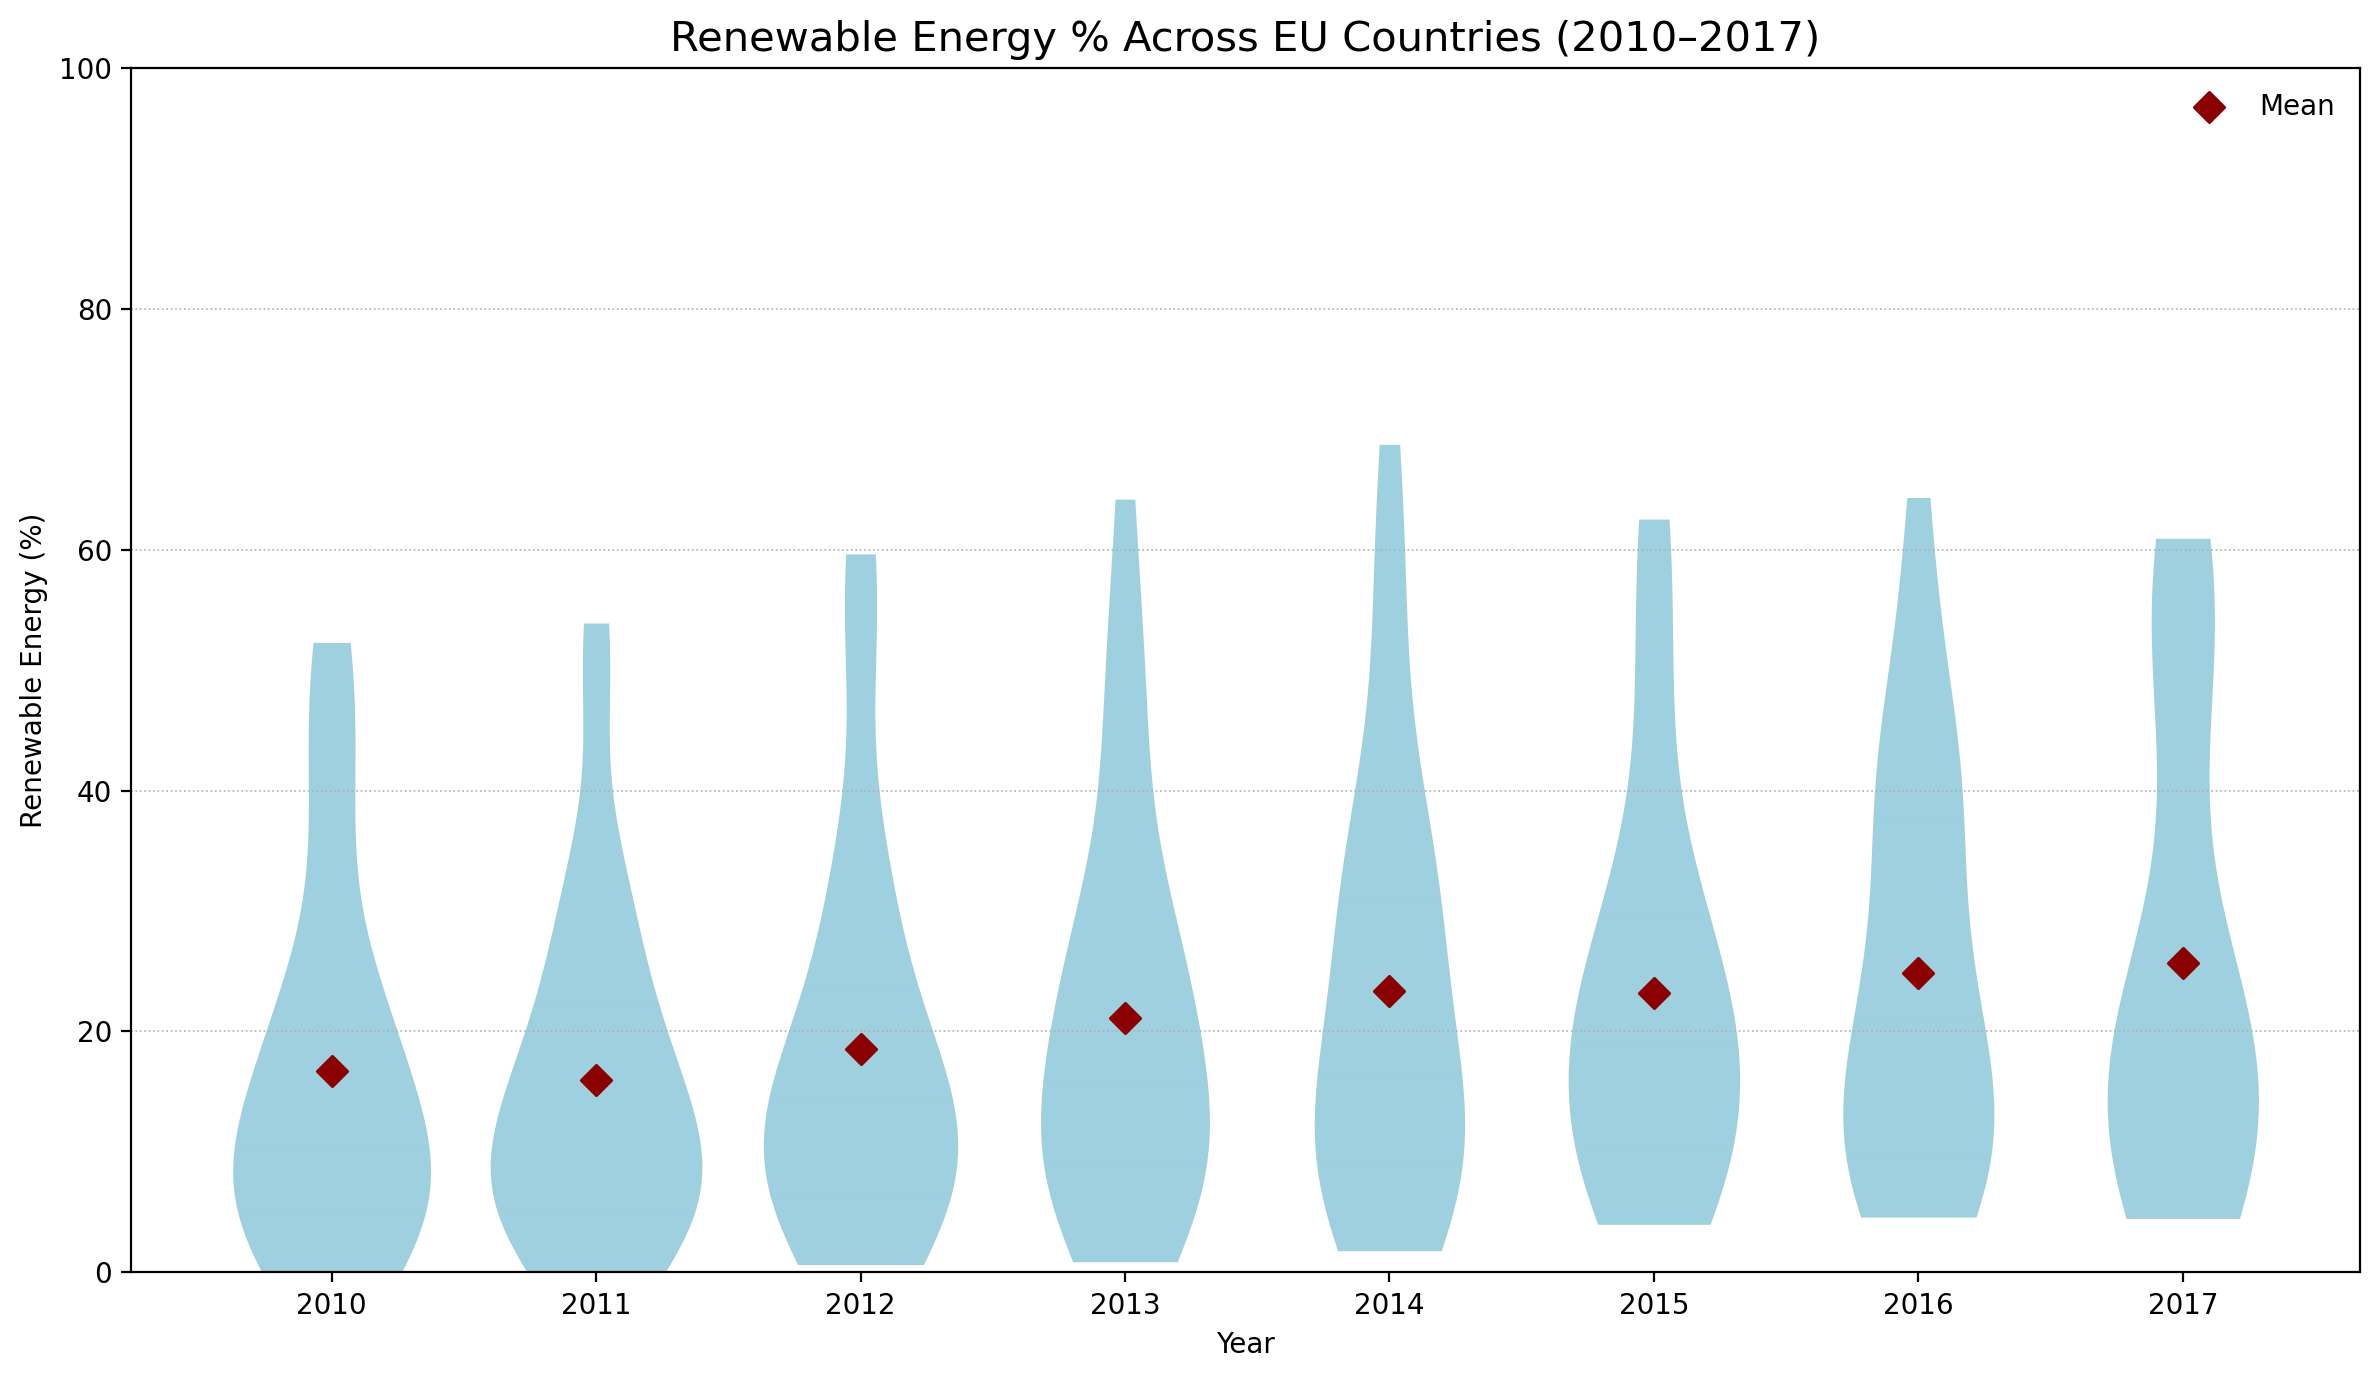

z:\SoftwareFAST\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


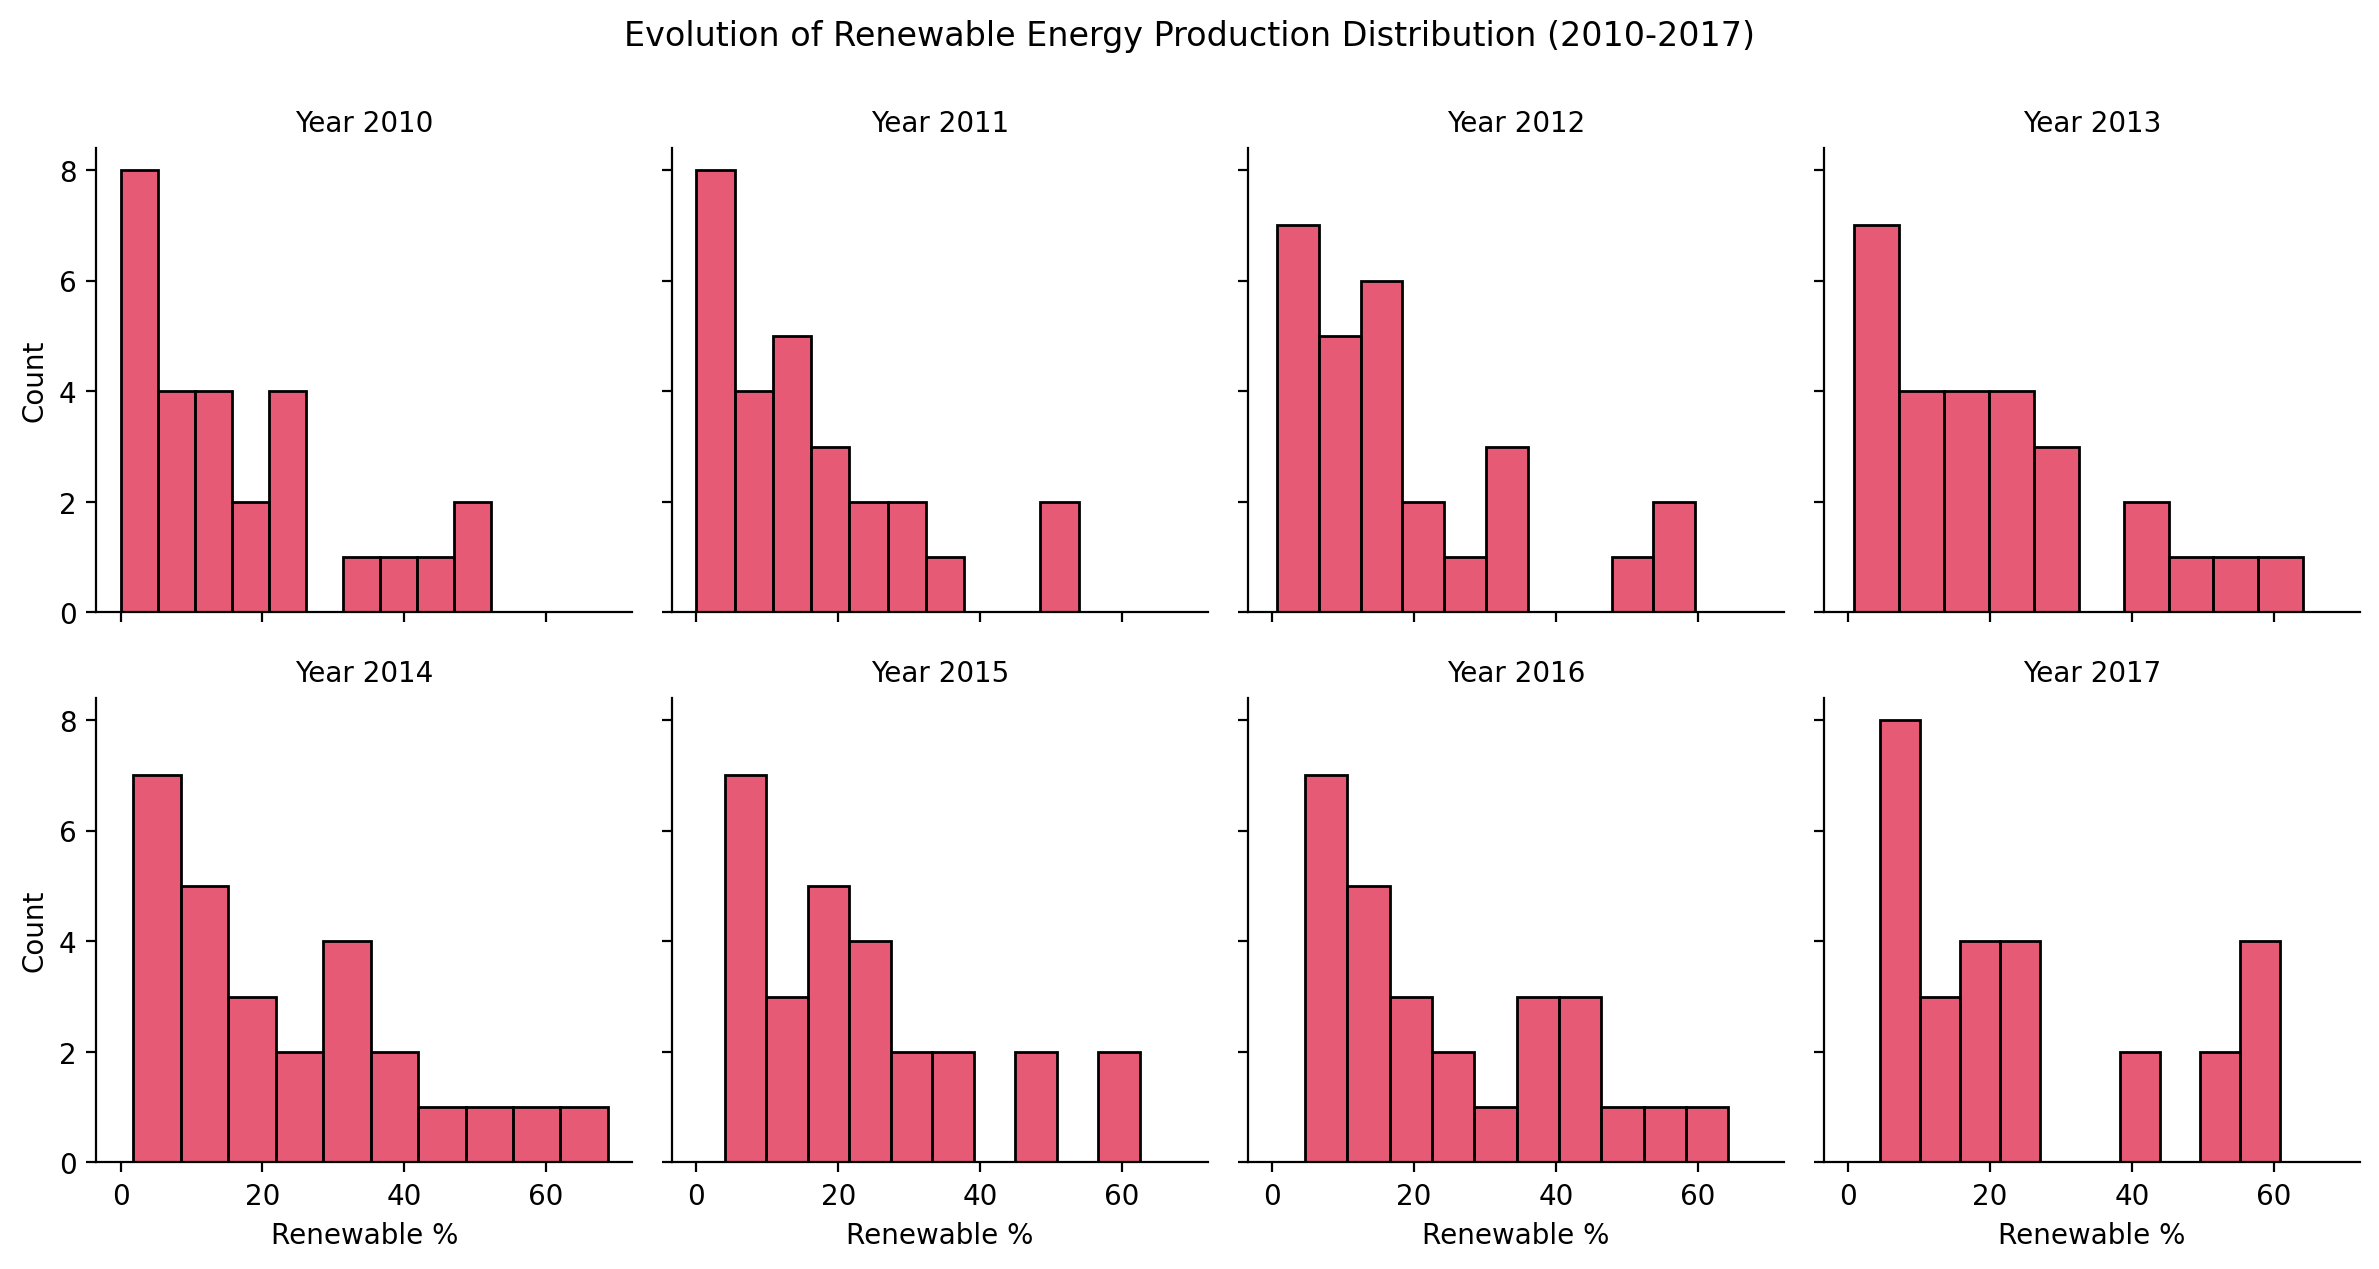

In [200]:
# Create violin plot
plt.figure(figsize=(12, 7))
sns.violinplot(
    data=eu_energy_2010_2017_df, 
    x='year', 
    y='renewable_pct',
    palette=["#94d5eb"],
    inner='quart',
    cut=0,
    linewidth=0.01
)

# Get mean value for each year and plot them as a single point inside the violin
mean_values = eu_energy_2010_2017_df.groupby('year')['renewable_pct'].mean()
plt.scatter(
    x=np.arange(len(mean_values)), 
    y=mean_values, 
    color='darkred', 
    marker='D', 
    s=60, 
    label='Mean', 
    zorder=3
)

plt.title('Renewable Energy % Across EU Countries (2010–2017)', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Renewable Energy (%)')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle=':', linewidth=0.6, alpha=1)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

# Create a FacetGrid to show the distribution of renewable energy production over the years
g = sns.FacetGrid(
    eu_energy_2010_2017_df, 
    col='year', 
    col_wrap=4, 
    height=3, 
    sharex=True, 
    sharey=True
)
g.map(sns.histplot, 'renewable_pct', bins=10, color='crimson', alpha=0.7)
g.set_titles("Year {col_name}")
g.set_axis_labels("Renewable %", "Count")
g.fig.suptitle('Evolution of Renewable Energy Production Distribution (2010-2017)', y=1.05)
plt.show()

Ho voluto utilizzare un violin plot perchè ho ritenuto essere il miglior chart per poter visualizzare contemporaneamente la distribuzione (e anche in quale volume) e l'avanzamento lungo il tempo. Al contempo ho inserito una visualizzazione a punti per poter tenere traccia della media all'interno di ogni distribuzione, permettendo di facilmente individuare un incremento di percentuale media con il passare degli anni. Come secondo grafico ho inserito molteplici bar plot per avere un dettaglio maggiore della distribuzione (in maniera più numerica). Quest'ultimo non è il grafico principale ma è solamente un supporto.

--

6. Please provide visualizations that show the evolution over the years (from 1990 to 2020) of:
    - Renewable energy production per capita for each country
    - Clean energy production per capita for each country
    - Net import per capita for each country

    Are there countries that behave differently from the others?

    *Please note that the goal of the visualization is not to compare all the countries with each other but to identify which ones present different trends compared to all the others.*

In [202]:
eu_energy_df['renewable_per_capita'] = eu_energy_df['total_renewable'] / eu_energy_df['population'] * 1000

eu_energy_df['clean_per_capita'] = eu_energy_df['renewable_per_capita'] + (eu_energy_df['nuclear_electricity'] / eu_energy_df['population']) * 1000

eu_energy_df['net_imports_per_capita'] = eu_energy_df['net_elec_imports'] / eu_energy_df['population'] * 1000

median_trends = eu_energy_df.groupby('year')[
    ['renewable_per_capita', 'clean_per_capita', 'net_imports_per_capita']
].median().reset_index()

source_median = ColumnDataSource(median_trends)
source_all = ColumnDataSource(eu_energy_df)
source_country = ColumnDataSource(data=dict(
    year=[], renewable=[], clean=[], imports=[], country_name=[]
))

def create_figure(title):
    p = figure(
        title=title,
        width=1000,
        height=300,
        x_range=(1990, 2020),
        tools="pan,wheel_zoom,reset",
        toolbar_location=None,
        outline_line_color=None,
    )
    p.xaxis.axis_label = "Year"
    p.yaxis.axis_label = "kWh per capita"
    p.yaxis.formatter = NumeralTickFormatter(format="0.000e")
    p.xaxis.minor_tick_line_color = None
    p.yaxis.minor_tick_line_color = None
    p.grid.grid_line_color = None
    
    return p

p1 = create_figure("Renewable Energy per Capita")

median_line1 = p1.line('year', 'renewable_per_capita', source=source_median,
                       line_color="#404040", line_dash="dashed")

country_line1 = p1.line('year', 'renewable', source=source_country,
                        line_color="#e6550d", line_width=2)

hover_median1 = HoverTool(renderers=[median_line1], tooltips=[
    ("Year", "@year"), ("Value", "@renewable_per_capita{0.0000e} kWh")
], mode="vline")

hover_country1 = HoverTool(renderers=[country_line1], tooltips=[
    ("Year", "@year"), ("Renewable", "@renewable{0.0000e} kWh"), ("Country", "@country_name")
], mode="vline")


p2 = create_figure("Clean Energy per Capita")

median_line2 = p2.line('year', 'clean_per_capita', source=source_median,
                       line_color="#404040", line_dash="dashed")

country_line2 = p2.line('year', 'clean', source=source_country,
                        line_color="#3182bd", line_width=2)

hover_median2 = HoverTool(renderers=[median_line2], tooltips=[
    ("Year", "@year"), ("Value", "@clean_per_capita{0.0000e} kWh")
], mode="vline")

hover_country2 = HoverTool(renderers=[country_line2], tooltips=[
    ("Year", "@year"), ("Clean", "@clean{0.0000e} kWh"), ("Country", "@country_name")
], mode="vline")



p3 = create_figure("Net Electricity Imports per Capita")

median_line3 = p3.line('year', 'net_imports_per_capita', source=source_median,
                       line_color="#404040", line_dash="dashed")

country_line3 = p3.line('year', 'imports', source=source_country,
                        line_color="#31a354", line_width=2)

hover_median3 = HoverTool(renderers=[median_line3], tooltips=[
    ("Year", "@year"), ("Value", "@net_imports_per_capita{0.0000e} kWh")
], mode="vline")

hover_country3 = HoverTool(renderers=[country_line3], tooltips=[
    ("Year", "@year"), ("Imports", "@imports{0.0000e} kWh"), ("Country", "@country_name")
], mode="vline")

p1.add_tools(hover_country1, hover_median1)
p2.add_tools(hover_country2, hover_median2)
p3.add_tools(hover_country3, hover_median3)


legend1 = Legend(items=[
    LegendItem(label={"field": "country_name"}, renderers=[country_line1]),
    LegendItem(label="EU Median", renderers=[median_line1])
])
legend2 = Legend(items=[
    LegendItem(label={"field": "country_name"}, renderers=[country_line2]),
    LegendItem(label="EU Median", renderers=[median_line2])
])
legend3 = Legend(items=[
    LegendItem(label={"field": "country_name"}, renderers=[country_line3]),
    LegendItem(label="EU Median", renderers=[median_line3])
])

p1.add_layout(legend1, 'right')
p2.add_layout(legend2, 'right')
p3.add_layout(legend3, 'right')

countries = sorted(eu_energy_df['country'].unique())
select = Select(title="Select Country:", value="Italy", options=countries)

callback = CustomJS(args=dict(source_all=source_all, source_country=source_country), code="""
    const country = cb_obj.value;
    const data = source_all.data;
    const new_data = {
        year: [],
        renewable: [],
        clean: [],
        imports: [],
        country_name: []
    };

    for (let i = 0; i < data['country'].length; i++) {
        if (data['country'][i] === country) {
            new_data.year.push(data['year'][i]);
            new_data.renewable.push(data['renewable_per_capita'][i]);
            new_data.clean.push(data['clean_per_capita'][i]);
            new_data.imports.push(data['net_imports_per_capita'][i]);
            new_data.country_name.push(country);
        }
    }

    source_country.data = new_data;
    source_country.change.emit(); """)

select.js_on_change('value', callback)

initial = eu_energy_df[eu_energy_df['country'] == "Italy"]
source_country.data = {
    'year': initial['year'].tolist(),
    'renewable': initial['renewable_per_capita'].tolist(),
    'clean': initial['clean_per_capita'].tolist(),
    'imports': initial['net_imports_per_capita'].tolist(),
    'country_name': ["Italy"] * len(initial)
}
show(column(select, p1, p2, p3))


## Section 3 - Graph Redesign and Analysis (15 points) 📊

**Data Source:** `market_value_decline.csv`

The 2008 financial crisis had a significant impact on banks worldwide, leading to substantial losses in market value. The following graph compares the market value of major banks in 2007 (pre-crisis) and 2009 (post-crisis), using blue to represent their value before the meltdown and green to represent their value after.

The **primary** goal of this visualization is to highlight the extent of losses suffered by each bank, while also drawing attention to J.P. Morgan’s relatively minor decline compared to its peers. The **secondary** goal is to illustrate the overall ranking of banks by market value, showing their relative sizes before and after the crisis.

Does this visualization effectively convey both the absolute losses and the percentage changes in market value? Does it allow for an easy comparison of which banks retained the most value relative to their original size?

1. Evaluate the effectiveness of the graph in communicating the market value losses and the relative sizes of the banks. What improvements can be made?
2. Propose a visualization that better captures both the absolute and relative losses per bank. Should we emphasize the percentage decline more? Should we use a different chart type?
3. Implement your proposed visualization using the *market_value_decline* dataset.

**Exercise Submission Requirements:**
1. `Written analysis` of the original graph's shortcomings: Please examine the existing graph and identify any issues that hinder its ability to clearly convey the intended quantitative message.
2. `Justifications` for the proposed improvements: For each issue you identify, please discuss potential improvements or alternative visualization techniques that might resolve these issues.
3. `Redesigned graph` that better communicates the data. Be sure to explain how your redesign enhances data interpretation and achieves the intended objectives more effectively.

![exercise3.png](exercise3.png)




In [ ]:
# Load the market valuedecline dataset 
market_cap_df = pd.read_csv('./datasets/market_value_decline.csv', delimiter=';')
market_cap_df.head()

,Unnamed: 0,market_value_2007,market_value_2009
0,Morgan Stanley,49,16.0
1,RBS,120,4.6
2,Deutsche Bank,76,10.3
3,Credit Agricole,67,17.0
4,Societe Generale,80,26.0


In [205]:
# Rename the first column to 'Company'
market_cap_df = market_cap_df.rename(columns={'Unnamed: 0': 'Company'})
market_cap_df.head()

,Company,market_value_2007,market_value_2009,Difference,Decrease Ratio
0,Morgan Stanley,49,16.0,33.0,32.653061
10,Goldman Sachs,75,35.0,40.0,46.666667
3,Credit Agricole,67,17.0,50.0,25.373134
11,Santander,116,64.0,52.0,55.172414
4,Societe Generale,80,26.0,54.0,32.500000


In [ ]:
# Calculate absolute difference between 2007 and 2009 market values and sort the df
market_cap_df["Difference"] = market_cap_df["market_value_2007"] - market_cap_df["market_value_2009"]
market_cap_df.sort_values(by="Difference", ascending=True, inplace=True)
market_cap_df

,Company,market_value_2007,market_value_2009,Difference,Decrease Ratio
0,Morgan Stanley,49,16.0,33.0,32.653061
10,Goldman Sachs,75,35.0,40.0,46.666667
3,Credit Agricole,67,17.0,50.0,25.373134
11,Santander,116,64.0,52.0,55.172414
4,Societe Generale,80,26.0,54.0,32.500000
8,UBS,100,35.0,65.0,35.000000
2,Deutsche Bank,76,10.3,65.7,13.552632
7,Unicredit,93,26.0,67.0,27.956989
9,Credit Suisse,100,27.0,73.0,27.000000
6,BNP Paribas,108,32.5,75.5,30.092593


In [208]:
# Calculate the percentage decrease in market value
market_cap_df['Decrease_Ratio'] = market_cap_df['market_value_2009'] * 100 / market_cap_df['market_value_2007']

source_diff = ColumnDataSource(market_cap_df)

# Create a horizontal bar chart for the absolute change in market value
p_bar = figure(
    y_range=market_cap_df['Company'], 
    width=900,
    title="Absolute Change in Market Value (2009 - 2007)",
    toolbar_location=None,
    x_range=(0, 260),
    min_border_right=40
)

bars_diff = p_bar.hbar(y='Company', right='Difference', height=0.4, 
                      source=source_diff)

p_bar.ygrid.grid_line_color = None
p_bar.xaxis.axis_label = "Market Value Change ($B)"
p_bar.xaxis.ticker = FixedTicker(ticks=list(range(0, 300, 20)))
p_bar.xaxis.major_label_orientation = "horizontal"

# Second chart that shows the market value before and after the crisis
sorted_market_cap_df = market_cap_df.sort_values('market_value_2009').copy()

source_paired = ColumnDataSource(data={
    'company': sorted_market_cap_df['Company'],
    'value_2007': sorted_market_cap_df['market_value_2007'],
    'value_2009': sorted_market_cap_df['market_value_2009']
})

p_paired = figure(
    y_range=sorted_market_cap_df['Company'], 
    width=900,
    title="Market Value Before (2007) and After (2009) Crisis",
    toolbar_location=None, 
    x_range=(0, 260),
    min_border_right=40
)

# Use 2 stacked bar for 2007 and 2009 values
bars_2007 = p_paired.hbar(y='company', right='value_2007', height=0.4, 
                         source=source_paired, color='#92C5DE', name='2007')

bars_2009 = p_paired.hbar(y='company', right='value_2009', height=0.4, 
                         source=source_paired, color='#B2182B', name='2009')

p_paired.ygrid.grid_line_color = None
p_paired.xaxis.axis_label = "Market Value($B)"
p_paired.xaxis.ticker = FixedTicker(ticks=list(range(0, 300, 20)))
p_paired.xaxis.major_label_orientation = "horizontal"

# Add hover tool
hover = HoverTool(
    tooltips=[
        ("Company", "@company"),
        ("2007 Value", "@value_2007{$0.0} B"),
        ("2009 Value", "@value_2009{$0.0} B")
    ],
    mode='mouse'  # Only show one tooltip at a time
)
p_paired.add_tools(hover)

# Add legend
legend = Legend(items=[
    ("2007 (Before Crisis)", [bars_2007]),
    ("2009 (After Crisis)", [bars_2009])
], location="bottom_right")

p_paired.add_layout(legend)

# Combine plots vertically
combined = column(p_bar, p_paired)

show(combined)

## Section 4 - Geospatial Analysis (35 points) 🌍

**Data Source:** `airports.csv`, `countries.csv`, `routes.csv`, `europe.geojson`.

Please create an interactive map representation—focused on European countries—such that, when a country is selected, the map displays the flight balance (number of incoming flights - number of outgoing flights) between that country and all other European countries. The map should dynamically update based on the selected country, visually representing the extent to which each country is a net sender or receiver of flights.

**Hints**:
1. If `A` is a GeoDataFrame and `B` a DataFrame, the result of `A.merge(B,..)` is a GeoDataFrame, whereas the result of `B.merge(A,..)` is a DataFrame. The function `to_json()` on a DataFrame with a geometry column does **not** work.
2. When updating the map, to access the color mapper you can use the following method: `color_mapper = p.select_one(LinearColorMapper)`, where `p` is the figure.
3. You can discard Guernsey and Gibraltar that are not present in the geojson.

In [ ]:
# Load all datasets (they have different delimiters)
airports_df = pd.read_csv('./datasets/airports.csv', delimiter=',')
countries_df = pd.read_csv('./datasets/countries.csv', delimiter=';')
routes_df = pd.read_csv('./datasets/routes.csv', delimiter=';')
europe_geo = gpd.read_file('./datasets/europe.geojson')

print(airports_df.head())
print(countries_df.head())
print(routes_df.head())
print(europe_geo.head())


   ID                                 airport_name          city  \
0   1                               Goroka Airport        Goroka   
1   2                               Madang Airport        Madang   
2   3                 Mount Hagen Kagamuga Airport   Mount Hagen   
3   4                               Nadzab Airport        Nadzab   
4   5  Port Moresby Jacksons International Airport  Port Moresby   

            country IATA  ICAO  latitude   longitude  altitude timezone DST  \
0  Papua New Guinea  GKA  AYGA -6.081690  145.391998      5282       10   U   
1  Papua New Guinea  MAG  AYMD -5.207080  145.789001        20       10   U   
2  Papua New Guinea  HGU  AYMH -5.826790  144.296005      5388       10   U   
3  Papua New Guinea  LAE  AYNZ -6.569803  146.725977       239       10   U   
4  Papua New Guinea  POM  AYPY -9.443380  147.220001       146       10   U   

   tz_database_timezone     type       source  
0  Pacific/Port_Moresby  airport  OurAirports  
1  Pacific/Port_More

In [210]:
# Standardize the column names by removing wrong spaces and converting to lowercase
airports_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
countries_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
routes_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
europe_geo.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

# Drop rows with NaN values
airports_df.dropna(inplace=True)
countries_df.dropna(inplace=True)
routes_df.dropna(inplace=True)
europe_geo.dropna(inplace=True)

In [211]:
# filter the airports_df to include only the airports from europe
european_airports = airports_df[airports_df['country'].isin(countries_df['name'].unique())].copy()

# Convert the airport IDs to string to match with routes_df
routes_df["source_airport_id"] = routes_df["source_airport_id"].astype('str')
european_airports["id"] = european_airports["id"].astype('str')

# Merge the routes_df with the european_airports to get the country information for both source and destination airports
routes_with_countries = routes_df.merge(
    european_airports[['id', 'country']],
    left_on='source_airport_id',
    right_on='id',
    how='inner'
).merge(
    european_airports[['id', 'country']],
    left_on='destination_airport_id',
    right_on='id',
    how='inner',
    suffixes=('_source', '_destination')
)
routes_with_countries.head()


,airline,airline_id,source_airport,source_airport_id,destination_airport,destination_airport_id,codeshare,stops,equipment,id_source,country_source,id_destination,country_destination
0,LH,3320,TOS,663,ALF,632,Y,0,73G,663,Norway,632,Norway
1,A3,96,ARN,737,SKG,1486,Y,0,736,737,Sweden,1486,Greece
2,OA,3776,ATH,3941,SKG,1486,Y,0,320 321 DH4,3941,Greece,1486,Greece
3,A3,96,CPH,609,SKG,1486,Y,0,320,609,Denmark,1486,Greece
4,LH,3320,DUS,345,SKG,1486,Y,0,321,345,Germany,1486,Greece


In [44]:
# Create flight balance DataFrame
countries_names = europe_geo["name"].unique()
outgoing = routes_with_countries.groupby('country_source').size().reset_index(name='outgoing')
incoming = routes_with_countries.groupby('country_destination').size().reset_index(name='incoming')

flight_balance = pd.merge(incoming, outgoing, left_on='country_destination', right_on='country_source', how='outer')
flight_balance['country'] = flight_balance['country_destination'].combine_first(flight_balance['country_source'])
flight_balance = flight_balance[['country', 'incoming', 'outgoing']].fillna(0)
flight_balance['balance'] = flight_balance['incoming'] - flight_balance['outgoing']

# Merge with geographic data
merged = europe_geo.merge(flight_balance, left_on='name', right_on='country', how='left').fillna({'balance': 0})

# Convert to GeoJSON string (the crucial fix)
geojson_str = merged.to_json()

# Create GeoJSONDataSource
geosource = GeoJSONDataSource(geojson=geojson_str)

print(flight_balance['balance'].min(), flight_balance['balance'].max())

palette = Reds[6]
palette = palette[::-1]
color_mapper = LinearColorMapper(palette=palette, low=-10, high=15)
color_bar = ColorBar(color_mapper=color_mapper, width=20, height=500, label_standoff=8, location=(0,0), title='Flight Balance')

p = figure(
    title='Flight Balance: (Incoming - Outgoing Flights)',
    height=600,
    width=800,
    toolbar_location="below",
    tools="pan,wheel_zoom,reset"
)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
p.axis.visible = False

plotted_countries = p.patches(
    'xs', 'ys',
    source=geosource,
    fill_color={'field': 'balance', 'transform': color_mapper},
    line_color='gray',
    line_width=0.25,
    fill_alpha=1
)
hover = HoverTool(
    tooltips=[('Country', '@name'), ('Flight Balance', '@balance')],
    renderers=[plotted_countries],
    mode='mouse'
)

p.add_tools(hover)
p.add_layout(color_bar, 'right')
show(p)

-7 13


## Datasets Description

You can find the dataset in the `datasets` folder. The descriptions of the datasets are provided below.

### Used Cars

The content of the dataset is in German, but it should not impose critical issues in understanding the data. Each entry contains the following information.

| **Field**                    | **Description** |
|------------------------------|---------------|
| **dateCrawled**               | When this ad was first crawled, all field values are taken from this date. |
| **name**                      | The name of the car. |
| **seller**                    | Seller type (private or dealer). |
| **offerTypeprice**            | The price in euros for the car on the ad. |
| **abtest**                    | Type of test. |
| **vehicleType**               | Type of vehicle. |
| **yearOfRegistration**        | The year the car was first registered. |
| **gearboxpowerPS**            | Power of the car in PS (horsepower). |
| **modelkilometer**            | How many kilometers the car has driven. |
| **monthOfRegistration**       | The month the car was first registered. |
| **fuelType**                  | Vehicle fuel type. |
| **brand**                     | Vehicle brand. |
| **notRepairedDamage**         | If the car has any damage that has not been repaired yet. |
| **dateCreated**               | The date the ad was created on eBay. |
| **nrOfPictures**              | Number of pictures in the ad. |
| **postalCodelastSeenOnline**  | When the crawler last saw this ad online. |


### US Accidents

| **Field**              | **Description** |
|------------------------|---------------|
| **ID** | Unique identifier of the accident record. |
| **Severity** | Severity of the accident (1-4), where 1 indicates the least impact on traffic and 4 indicates significant impact. |
| **Start_Time** | Start time of the accident in local time zone. |
| **End_Time** | End time of the accident in local time zone (when the impact on traffic flow was dismissed). |
| **Start_Lat** | Latitude in GPS coordinate of the start point. |
| **Start_Lng** | Longitude in GPS coordinate of the start point. |
| **End_Lat** | Latitude in GPS coordinate of the end point. |
| **End_Lng** | Longitude in GPS coordinate of the end point. |
| **Distance(mi)** | Length of the road extent affected by the accident. |
| **Description** | Natural language description of the accident. |
| **Number** | Street number in address field. |
| **Street** | Street name in address field. |
| **Side** | Relative side of the street (Right/Left) in address field. |
| **City** | City in address field. |
| **County** | County in address field. |
| **State** | State in address field. |
| **Zipcode** | Zipcode in address field. |
| **Country** | Country in address field. |
| **Timezone** | Timezone based on the location of the accident (eastern, central, etc.). |
| **Airport_Code** | Closest airport-based weather station to the accident location. |
| **Weather_Timestamp** | Timestamp of weather observation record (in local time). |
| **Temperature(F)** | Temperature (in Fahrenheit). |
| **Wind_Chill(F)** | Wind chill (in Fahrenheit). |
| **Humidity(%)** | Humidity (in percentage). |
| **Pressure(in)** | Air pressure (in inches). |
| **Visibility(mi)** | Visibility (in miles). |
| **Wind_Direction** | Wind direction. |
| **Wind_Speed(mph)** | Wind speed (in miles per hour). |
| **Precipitation(in)** | Precipitation amount in inches, if any. |
| **Weather_Condition** | Weather condition (rain, snow, thunderstorm, fog, etc.). |
| **Amenity** | POI annotation indicating presence of an amenity nearby. |
| **Bump** | POI annotation indicating presence of a speed bump or hump nearby. |
| **Crossing** | POI annotation indicating presence of a crossing nearby. |
| **Give_Way** | POI annotation indicating presence of a give-way sign nearby. |
| **Junction** | POI annotation indicating presence of a junction nearby. |
| **No_Exit** | POI annotation indicating presence of a no-exit nearby. |
| **Railway** | POI annotation indicating presence of a railway nearby. |
| **Roundabout** | POI annotation indicating presence of a roundabout nearby. |
| **Station** | POI annotation indicating presence of a station nearby. |
| **Stop** | POI annotation indicating presence of a stop sign nearby. |
| **Traffic_Calming** | POI annotation indicating presence of traffic calming measures nearby. |
| **Traffic_Signal** | POI annotation indicating presence of a traffic signal nearby. |
| **Turning_Loop** | POI annotation indicating presence of a turning loop nearby. |
| **Sunrise_Sunset** | Period of day (day or night) based on sunrise/sunset. |
| **Civil_Twilight** | Period of day (day or night) based on civil twilight. |
| **Nautical_Twilight** | Period of day (day or night) based on nautical twilight. |
| **Astronomical_Twilight** | Period of day (day or night) based on astronomical twilight. |


### Energy Data

| **Field**                | **Description** |
|---------------------------|-----------------|
| **country**               | Geographic location. |
| **year**                  | Year of observation. |
| **gdp**                   | (Gross Domestic Product) This data is adjusted for inflation and differences in the cost of living between countries. |
| **population**            | Population by country, based on data and estimates from different sources. |
| **greenhouse_gas_emissions** | Emissions from electricity generation. Measured in megatonnes of CO₂ equivalents. |
| **net_elec_imports**      | Net electricity imports. Electricity imports minus exports, measured in TWh. |
| **biofuel_consumption**   | Primary energy consumption from biofuels. Measured in terawatt-hours. |
| **coal_consumption**      | Primary energy consumption from coal. Measured in terawatt-hours. |
| **fossil_fuel_consumption** | Primary energy consumption from fossil fuels. Measured in terawatt-hours. |
| **gas_consumption**       | Primary energy consumption from gas. Measured in terawatt-hours. |
| **oil_consumption**       | Primary energy consumption from oil. Measured in terawatt-hours. |
| **nuclear_consumption**   | Primary energy consumption from nuclear power. Measured in terawatt-hours, using the substitution method. |
| **hydro_consumption**     | Primary energy consumption from hydropower. Measured in terawatt-hours, using the substitution method. |
| **solar_consumption**     | Primary energy consumption from solar power. Measured in terawatt-hours, using the substitution method. |
| **wind_consumption**      | Primary energy consumption from wind power. Measured in terawatt-hours, using the substitution method. |
| **biofuel_electricity**   | Electricity generation from bioenergy. Measured in terawatt-hours. |
| **coal_electricity**      | Electricity generation from coal. Measured in terawatt-hours. |
| **fossil_electricity**    | Electricity generation from fossil fuels. Measured in terawatt-hours. |
| **gas_electricity**       | Electricity generation from gas. Measured in terawatt-hours. |
| **oil_electricity**       | Electricity generation from oil. Measured in terawatt-hours. |
| **nuclear_electricity**   | Electricity generation from nuclear. Measured in terawatt-hours. |
| **hydro_electricity**     | Electricity generation from hydropower. Measured in terawatt-hours. |
| **solar_electricity**     | Electricity generation from solar power. Measured in terawatt-hours. |
| **wind_electricity**      | Electricity generation from wind power. Measured in terawatt-hours. |



### Airports

As of January 2017, the OpenFlights Airports Database contains over 10,000 airports, train stations and ferry terminals spanning the globe, as shown in the map above. Each entry contains the following information:

| **Field**                 | **Description** |
|---------------------------|---------------|
| **Airport ID** | Unique OpenFlights identifier for this airport. |
| **Name** | Name of the airport. May or may not contain the city name. |
| **City** | Main city served by the airport. May be spelled differently from the name. |
| **Country** | Country or territory where the airport is located. Can be cross-referenced with ISO 3166-1 codes. |
| **IATA** | 3-letter IATA code. Null if not assigned/unknown. |
| **ICAO** | 4-letter ICAO code. Null if not assigned/unknown. |
| **Latitude** | Decimal degrees, usually to six significant digits. Negative is South, positive is North. |
| **Longitude** | Decimal degrees, usually to six significant digits. Negative is West, positive is East. |
| **Altitude** | Altitude in feet. |
| **Timezone** | Hours offset from UTC. Fractional hours are expressed as decimals (e.g., India is 5.5). |
| **DST** | Daylight savings time classification: E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None), or U (Unknown). |
| **Tz database time zone** | Timezone in "tz" (Olson) format (e.g., "America/Los_Angeles"). |
| **Type** | Type of the airport. Value is "airport" for air terminals. |
| **Source** | Source of the data. "OurAirports" for data sourced from OurAirports. |


### Routes

As of June 2014, the OpenFlights/Airline Route Mapper Route Database contains 67663 routes between 3321 airports on 548 airlines spanning the globe. \
Each entry contains the following information.

| **Field**                | **Description** |
|--------------------------|---------------|
| **Airline** | 2-letter (IATA) or 3-letter (ICAO) code of the airline. |
| **Airline ID** | Unique OpenFlights identifier for the airline. |
| **Source airport** | 3-letter (IATA) or 4-letter (ICAO) code of the source airport. |
| **Source airport ID** | Unique OpenFlights identifier for the source airport. |
| **Destination airport** | 3-letter (IATA) or 4-letter (ICAO) code of the destination airport. |
| **Destination airport ID** | Unique OpenFlights identifier for the destination airport. |
| **Codeshare** | "Y" if the flight is a codeshare (operated by another carrier), empty otherwise. |
| **Stops** | Number of stops on the flight ("0" for direct). |
| **Equipment** | 3-letter codes for plane type(s) generally used on this flight, separated by spaces. |


The data is UTF-8 encoded. The special value `\N` is used for "NULL" to indicate that no value is available, and is understood automatically by MySQL if imported


<aside>
💡 Notes:

- Routes are directional: if an airline operates services from A to B and from B to A, both A-B and B-A are listed separately.
- Routes where one carrier operates both its own and codeshare flights are listed only once.
</aside>


### Countries

This dataset contains the information related to European countries. 